# Análise microdados ENEM - Déficit de atenção

### Importando as bibliotecas e criando variáveis para os microdados

#### Tempo de execução: 5:00 minutos <br>Intel Core i5 inside <br>8GB DDR3 L <br>Intel graphics 520

In [2]:
# importacao de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

low_memory = False

# lendo os arquivos csv
microdadosEnem2014 = pd.read_csv('DADOS/MICRODADOS_ENEM_2014.csv', sep=',', encoding='ISO-8859-1', usecols = ['UF_RESIDENCIA', 'UF_PROVA', 'IN_DEFICIT_ATENCAO', 'NU_NOTA_REDACAO'])
microdadosEnem2015 = pd.read_csv('DADOS/MICRODADOS_ENEM_2015.csv', sep=',', encoding='ISO-8859-1', usecols = ['SG_UF_RESIDENCIA', 'SG_UF_PROVA', 'IN_DEFICIT_ATENCAO', 'NU_NOTA_REDACAO'])
microdadosEnem2016 = pd.read_csv('DADOS/MICRODADOS_ENEM_2016.csv', sep=';', encoding='ISO-8859-1', usecols = ['SG_UF_RESIDENCIA', 'SG_UF_PROVA', 'IN_DEFICIT_ATENCAO', 'NU_NOTA_REDACAO'])
microdadosEnem2017 = pd.read_csv('DADOS/MICRODADOS_ENEM_2017.csv', sep=';', encoding='ISO-8859-1', usecols = ['SG_UF_RESIDENCIA', 'SG_UF_PROVA', 'IN_DEFICIT_ATENCAO', 'NU_NOTA_REDACAO'])
microdadosEnem2018 = pd.read_csv('DADOS/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols = ['SG_UF_RESIDENCIA', 'SG_UF_PROVA', 'IN_DEFICIT_ATENCAO', 'NU_NOTA_REDACAO'])

### Criando as variáveis para o gráfico

In [115]:
# variaveis para o grafico
anos = ['2014', '2015', '2016', '2017', '2018']
dados_por_ano = []
dados_por_ano_sem_df = []

### Consultando a quantidade de candidatos com deficit de atenção

In [116]:
# consulta de candidatos com deficit de atencao
deficit2014 = microdadosEnem2014.query('(IN_DEFICIT_ATENCAO == 1)')['IN_DEFICIT_ATENCAO'].count()
deficit2015 = microdadosEnem2015.query('(IN_DEFICIT_ATENCAO == 1)')['IN_DEFICIT_ATENCAO'].count()
deficit2016 = microdadosEnem2016.query('(IN_DEFICIT_ATENCAO == 1)')['IN_DEFICIT_ATENCAO'].count()
deficit2017 = microdadosEnem2017.query('(IN_DEFICIT_ATENCAO == 1)')['IN_DEFICIT_ATENCAO'].count()
deficit2018 = microdadosEnem2018.query('(IN_DEFICIT_ATENCAO == 1)')['IN_DEFICIT_ATENCAO'].count()

In [117]:
deficit2014, deficit2015, deficit2016, deficit2017, deficit2018

(4792, 3848, 5300, 7789, 7199)

### Consultando a quantidade de candidatos sem deficit de atenção

In [118]:
# consulta de candidatos sem deficit de atencao
deficit2014sdf = microdadosEnem2014.query('(IN_DEFICIT_ATENCAO == 0)')['IN_DEFICIT_ATENCAO'].count()
deficit2015sdf = microdadosEnem2015.query('(IN_DEFICIT_ATENCAO == 0)')['IN_DEFICIT_ATENCAO'].count()
deficit2016sdf = microdadosEnem2016.query('(IN_DEFICIT_ATENCAO == 0)')['IN_DEFICIT_ATENCAO'].count()
deficit2017sdf = microdadosEnem2017.query('(IN_DEFICIT_ATENCAO == 0)')['IN_DEFICIT_ATENCAO'].count()
deficit2018sdf = microdadosEnem2018.query('(IN_DEFICIT_ATENCAO == 0)')['IN_DEFICIT_ATENCAO'].count()

In [119]:
deficit2014sdf, deficit2015sdf, deficit2016sdf, deficit2017sdf, deficit2018sdf

(8717456, 7742579, 8622067, 6723552, 5506548)

### Adicionando os valores obtidos nas listas

In [120]:
# adicionando as consultas na lista dados_por_ano
dados_por_ano.append(deficit2014)
dados_por_ano.append(deficit2015)
dados_por_ano.append(deficit2016)
dados_por_ano.append(deficit2017)
dados_por_ano.append(deficit2018)

In [121]:
dados_por_ano

[4792, 3848, 5300, 7789, 7199]

In [122]:
# adicionando as consultas na lista dados_por_ano_sem_df
dados_por_ano_sem_df.append(deficit2014sdf)
dados_por_ano_sem_df.append(deficit2015sdf)
dados_por_ano_sem_df.append(deficit2016sdf)
dados_por_ano_sem_df.append(deficit2017sdf)
dados_por_ano_sem_df.append(deficit2018sdf)

In [123]:
dados_por_ano_sem_df

[8717456, 7742579, 8622067, 6723552, 5506548]

## Número de candidatos com deficit de atenção ao longo dos anos

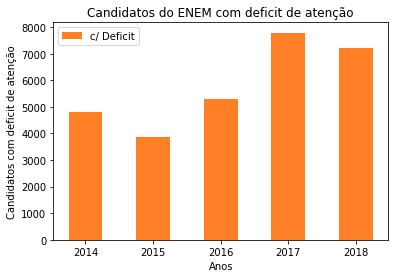

In [224]:
plt.bar(anos, dados_por_ano, color='#ff7f27', width=0.50, label='c/ Deficit')
plt.ylabel('Candidatos com deficit de atenção')
plt.xlabel('Anos')
plt.title('Candidatos do ENEM com deficit de atenção')

plt.legend()

## Número de candidatos sem deficit de atenção ao longo dos anos
Devido a diferença entre o número de candidatos, foi necessário criar um segundo gráfico para melhor visualização da diferença entre as quantidades entre pessoas com deficit e sem deficit.

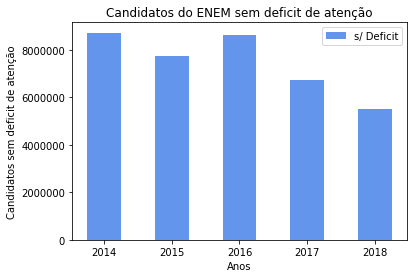

In [225]:
plt.bar(anos, dados_por_ano_sem_df, color='#6495ED', width=0.50, label='s/ Deficit')
plt.ylabel('Candidatos sem deficit de atenção')
plt.xlabel('Anos')
plt.title('Candidatos do ENEM sem deficit de atenção')

plt.legend()

# Relação das notas das redações (c/ deficit e s/ deficit)

In [213]:
# candidatos com df
redacao_por_ano = []

In [214]:
# candidatos sem df
redacao_por_ano_sem_df = []

## Notas Medianas

In [215]:
# fazendo a consulta de notas das pessoas c/ deficit
redacao2014 = microdadosEnem2014.query('(IN_DEFICIT_ATENCAO == 1 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()
redacao2015 = microdadosEnem2015.query('(IN_DEFICIT_ATENCAO == 1 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()
redacao2016 = microdadosEnem2016.query('(IN_DEFICIT_ATENCAO == 1 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()
redacao2017 = microdadosEnem2017.query('(IN_DEFICIT_ATENCAO == 1 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()
redacao2018 = microdadosEnem2018.query('(IN_DEFICIT_ATENCAO == 1 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()

In [216]:
redacao_por_ano.append(redacao2014)
redacao_por_ano.append(redacao2015)
redacao_por_ano.append(redacao2016)
redacao_por_ano.append(redacao2017)
redacao_por_ano.append(redacao2018)

In [217]:
redacao_por_ano

[597.4,
 668.9846590909091,
 673.310692669805,
 662.877170622909,
 671.902343109946]

In [218]:
# fazendo a consulta de notas das pessoas s/ deficit
redacao2014sdf = microdadosEnem2014.query('(IN_DEFICIT_ATENCAO == 0 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()
redacao2015sdf = microdadosEnem2015.query('(IN_DEFICIT_ATENCAO == 0 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()
redacao2016sdf = microdadosEnem2016.query('(IN_DEFICIT_ATENCAO == 0 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()
redacao2017sdf = microdadosEnem2017.query('(IN_DEFICIT_ATENCAO == 0 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()
redacao2018sdf = microdadosEnem2018.query('(IN_DEFICIT_ATENCAO == 0 and NU_NOTA_REDACAO)')['NU_NOTA_REDACAO'].mean()

In [219]:
redacao_por_ano_sem_df.append(redacao2014sdf)
redacao_por_ano_sem_df.append(redacao2015sdf)
redacao_por_ano_sem_df.append(redacao2016sdf)
redacao_por_ano_sem_df.append(redacao2017sdf)
redacao_por_ano_sem_df.append(redacao2018sdf)

In [220]:
redacao_por_ano_sem_df

[581.3305709023941,
 541.9724381337455,
 542.1498524635513,
 558.403625354807,
 522.5685460989124]

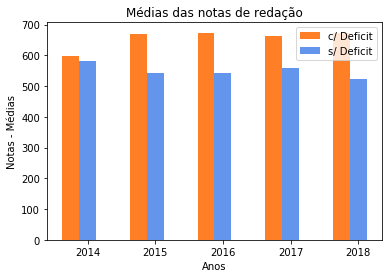

In [221]:
# redacao_por_ano
# redacao_por_ano_sem_df

# largura da barra
barWidth = 0.25

# posicao barra
b1 = np.arange(len(redacao_por_ano))
b2 = [x + barWidth for x in b1]

# criaçao de barras
plt.bar(b1, redacao_por_ano, color='#ff7f27', width=barWidth, label='c/ Deficit')
plt.bar(b2, redacao_por_ano_sem_df, color='#6495ED', width=barWidth, label='s/ Deficit')

# legenda
plt.xlabel('Anos')
plt.xticks([b + barWidth for b in range(len(redacao_por_ano))], anos)
plt.ylabel('Notas - Médias')
plt.title('Médias das notas de redação')

plt.legend()

### Média das notas de todos os anos

In [223]:
from statistics import mean

print(f'A média de notas medianas entre os anos avaliados é de {mean(redacao_por_ano)} pontos.')

A média de notas medianas entre os anos avaliados é de 654.8949730987138 pontos.
